# Projet de Fin de Deuxième Année
### Réalisé par : Abdelhak ELBIARI et IMRANE OU EL FAQUIR

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IIA import DeepNeuralNets, NeuralNets
import cv2
from sklearn import metrics

In [2]:
def plot_decision_boundary(pred_func, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

In [3]:
def show_dataset(path):
    dataset = pd.read_csv(path)
    dataset = dataset.sample(frac=1)
    vect = dataset.to_numpy()
    plt.scatter(vect.T[0][vect.T[2]==0], vect.T[1][vect.T[2]==0], c = 'b', marker = 'o')
    plt.scatter(vect.T[0][vect.T[2]==1], vect.T[1][vect.T[2]==1], c = 'r', marker = 'o')

In [85]:
def load_dataset(path):
    dataset = pd.read_csv(path)
    Y = dataset[['y']].to_numpy()
    X = dataset[['X_1', 'X_2']].to_numpy()
    m = X.shape[0]
    return X[0:int(0.85*m)], X[int(0.85*m):m], Y[0:int(0.85*m)], Y[int(0.85*m):m]

In [135]:
dataset = pd.read_csv('dataset.csv')
Y = dataset[['y']].to_numpy()
X = dataset[['X_1', 'X_2']].to_numpy()

# Testing Neural Network

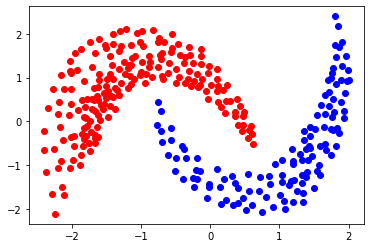

In [99]:
show_dataset('dataset.csv')

### Chargement des données d'entrainement et de test

In [100]:
X_train, X_test, y_train, y_test = load_dataset('dataset.csv')

### Initialisation de la classe NeuralNets

In [101]:
NN = NeuralNets(
    X_train.T, 
    y_train.T, 
    n_h            = 4,
    num_iterations = 5000,
    print_cost     = True,
    nbr_print      = 1000
)

### Lancement de l'algorithme

In [102]:
nn_parameters = NN.fit()

Cost after iteration 0: 0.693435
Cost after iteration 1000: 0.030473
Cost after iteration 2000: 0.002654
Cost after iteration 3000: 0.001314
Cost after iteration 4000: 0.000867


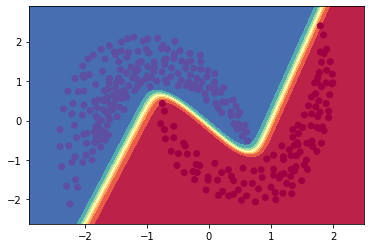

In [134]:
plot_decision_boundary(lambda x: NN.predict(nn_parameters, x.T), X = X, y = Y)

# Testing Deep Nural Network

In [166]:
dataset = pd.read_csv('dataset2.csv')
Y = dataset[['y']].to_numpy()
X = dataset[['X_1', 'X_2']].to_numpy()

### Nous allons utiliser un jeu de donnée très compliqué s'appel Freemasonry Dataset pour bien tester notre Framework

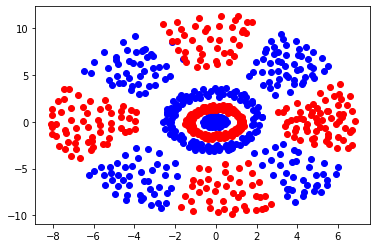

In [167]:
show_dataset('dataset2.csv')

### Chargement des données d'entrainement et de test

In [147]:
X_train, X_test, y_train, y_test = load_dataset('dataset2.csv')

### Initialisation de la dimension des couches de la réseaux de neurons profond

In [156]:
m   = 2   # couche d'entrer
n_1 = 20  # couche 1
n_2 = 10  # couche 2
n_3 = 1   # couche de sortie
layers_dims = [m, n_1, n_2, n_3]

### Déclaration de la classe DeepNeuralNets

In [157]:
DNN = DeepNeuralNets(
    X_train.T, 
    y_train.T, 
    layers_dims, 
    learning_rate = 0.0075, 
    num_iterations = 50000, 
    initialization = "random", 
    optimizer="gd", 
    print_cost=True,
    nbr_print = 5000
)

### Lancer l'algorithme à apprendre

Cost after iteration 0: 0.704291
Cost after iteration 5000: 0.656111
Cost after iteration 10000: 0.455297
Cost after iteration 15000: 0.385816
Cost after iteration 20000: 0.351100
Cost after iteration 25000: 0.329798
Cost after iteration 30000: 0.235038
Cost after iteration 35000: 0.126071
Cost after iteration 40000: 0.069535
Cost after iteration 45000: 0.042998


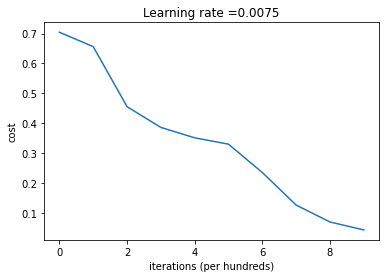

In [160]:
dnn_parameters = DNN.fit()

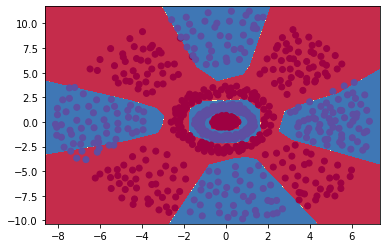

In [161]:
plot_decision_boundary(lambda x: DNN.predict(x.T, dnn_parameters), X = X, y = Y)

In [163]:
predicted = DNN.predict(X_test.T, dnn_parameters)
print(f"{metrics.classification_report(y_test, predicted)}\n")

              precision    recall  f1-score   support

           0       0.43      1.00      0.61        10
           1       1.00      0.86      0.93        94

    accuracy                           0.88       104
   macro avg       0.72      0.93      0.77       104
weighted avg       0.95      0.88      0.89       104




### Prédiction de la point X_test[0]

In [164]:
V = X_test[0].reshape(X_test[0].shape[0], 1)

In [165]:
DNN.predict(V, parameters_1)[0]

0.0

# Application de Deep Learning dans la diagnostic du pneumonie

### Converting an image to a vector

In [113]:
def image_to_array(path):
    x = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    return x.reshape(x.shape[0]*x.shape[1])/255

### Fonction pour charger les données

In [132]:
def load_data():
    X = np.array([image_to_array('./Dataset/NORMAL/1_1.png')/255])
    y = np.array([1])
    for k in range(99):
        try:
            X = np.append(X, np.array([image_to_array('./Dataset/NORMAL/1_'+str(k)+'.png')]), axis=0)
            y = np.append(y, 1)
            X = np.append(X, np.array([image_to_array('./Dataset/PNEUMONIA/0_'+str(k)+'.png')]), axis=0)
            y = np.append(y, 0)
        except: None
    y = y.reshape(y.shape[0],1)
    m = X.shape[0]
    return X[0:int(0.7*m)], X[int(0.7*m):m], y[0:int(0.7*m)], y[int(0.7*m):m]

### Chargement de données

In [138]:
# loading dataset 
X_train, X_test, y_train, y_test = load_data()

### Initialisation des dimensions des couches de deep learning

In [139]:
m   = 62500 # couche d'entrer
n_1 = 20    # couche 1
n_2 = 10    # couche 2
n_3 = 1     # couche de sortie
layers_dims = [m, n_1, n_2, n_3]

### Déclaration de la classe DeepNeuralNets

In [140]:
DNN = DeepNeuralNets(
    X_train.T, 
    y_train.T, 
    layers_dims, 
    learning_rate  = 0.0075, 
    num_iterations = 1000, 
    initialization = "random", # Méthode d'initialisation des paramètre Wi, b_i
    optimizer      = "gd",     # Méthode d'optimization
    print_cost     = True
)

### Déclaration de la méthode fit() pour lancer l'algorithme à apprendre

Cost after iteration 0: 0.713782
Cost after iteration 100: 0.469619
Cost after iteration 200: 0.341808
Cost after iteration 300: 0.183557
Cost after iteration 400: 0.120721
Cost after iteration 500: 0.079527
Cost after iteration 600: 0.054328
Cost after iteration 700: 0.037923
Cost after iteration 800: 0.027619
Cost after iteration 900: 0.020873


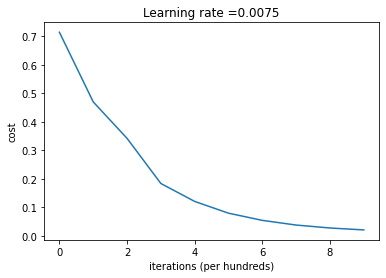

In [142]:
parameters = DNN.fit()

### Test et validation de notre modèle

In [148]:
predicted = DNN.predict(X_test.T, parameters)
print(f"{metrics.classification_report(y_test, predicted)}\n")

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.87      0.87      0.87        30

    accuracy                           0.86        59
   macro avg       0.86      0.86      0.86        59
weighted avg       0.86      0.86      0.86        59




### Prédiction de la point X_test[50]

In [146]:
V = X_test[50].reshape(X_test[50].shape[0],1)

In [147]:
DNN.predict(V, parameters)

array([0.])